In [1]:
import pandas as pd
df = pd.read_csv("df_news_romance.csv")
fv = df[["NN", "JJ"]]

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fv, df['label'],
                                                stratify=df['label'], 
                                                test_size=0.25,
                                                random_state = 42)

In [3]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state=42)
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

**Step 3b: Visualize the decision boundary**

To visualize the decision boundary, we plot a set of contours. Any points within contours belonging to a shared color family, for example shades of blue, are assigned to the class denoted by that color. A lighter color indicates less certainity that the point belongs in that class. In this example, news is blue and romance is orange. This example only has 2 features; to visualize datasets with more often requires using a dimension reduction algorithim to find a 2D representation of the data. 

We make `plot_boundary` a function because we will reuse it on the test data. `ListedColormap` and accessing colors using colormap indexing (`mcm.tab20c(1)`) is used to match the background colors to the colors we have been using for the feature vector. We then use the `Normalize` function to center the colors around the decision boundary. You can also use an out of the box colormap, listed at https://matplotlib.org/examples/color/colormaps_reference.html

In [4]:
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
tabcm = mcolors.ListedColormap([mcm.tab20c(0), mcm.tab20c(1), mcm.tab20c(2), mcm.tab20c(3),
                                mcm.tab20c(7), mcm.tab20c(6), mcm.tab20c(5), mcm.tab20c(4)])
norm = mcolors.Normalize(-7,7) 

In [6]:
import numpy as np
np.random.seed(42)

def jitter(arr):
    scale = .01*(arr.min() - arr.max())
    return arr + np.random.randn(arr.shape[0]) * scale

def plot_boundary(ax, clf, Xt, Xs, ys, title):
    # using all the data, create a meshgrid for the decision boundary
    h = .02
    x_min, x_max = Xt['NN'].values.min() - 1, Xt['NN'].values.max() + 1
    y_min, y_max = Xt['JJ'].values.min() - 1, Xt['JJ'].values.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    im = ax.contourf(xx, yy, Z, cmap=tabcm, norm=norm, alpha=.5)
    
    #plot the decision boundary
    ax.contour(xx, yy, Z, colors='k', linewidths=3, levels=[-1, 0, 1],
               linestyles=['--', '-', '--'], alpha=.5, zorder=20)
    
    # plot and label the data
    ax.scatter(jitter(Xs['NN'][ys=="news"]), jitter(Xs['JJ'][ys=="news"]), 
                color="tab:blue", label="news", edgecolor='k', alpha=.5)
    ax.scatter(jitter(Xs['NN'][ys=="romance"]), jitter(Xs['JJ'][ys=="romance"]), 
               color="tab:orange", label="romance", edgecolor='k', alpha=.5)
    
   

    ax.set_title(title)
    ax.set_xlabel("nouns")
    ax.set_ylabel("adjectives")
    
    # set the axes boundaries against the whole dataset
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect("equal")

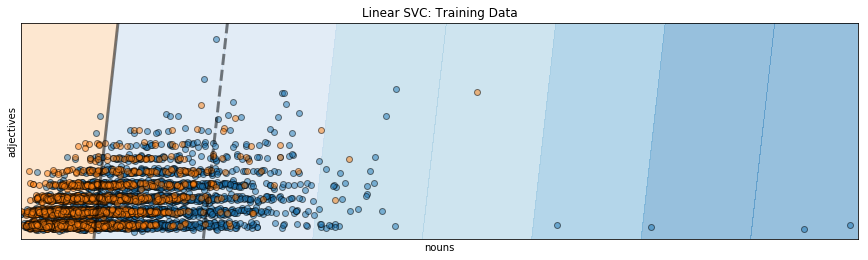

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
plot_boundary(ax, classifier, fv, X_train, y_train, "Linear SVC: Training Data")
fig.savefig("images/training_boundary.png", bbox_inches = 'tight', pad_inches = 0)

In [15]:
y_predict = classifier.predict(X_test)

In [16]:
classifier.score(X_test, y_test)

0.70759717314487636

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, y_predict)

array([[747, 409],
       [253, 855]])


|      |actual news | actual romance |
|:--: | :--:| :--:|
|predicted news | 747 | 409 |
|predicted romance|253 | 855|

## Visualization of the decision boundaries

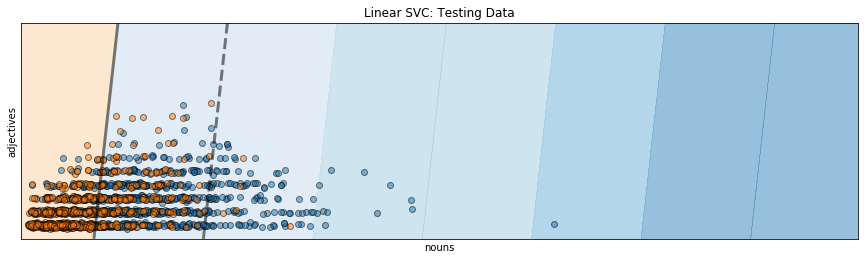

In [22]:
#let's make the plot
fig, ax = plt.subplots(figsize=(15,10))
plot_boundary(ax, classifier, fv, X_test, y_test, "Linear SVC: Testing Data")
fig.savefig("images/testing_boundary.png", bbox_inches = 'tight', pad_inches = 0)

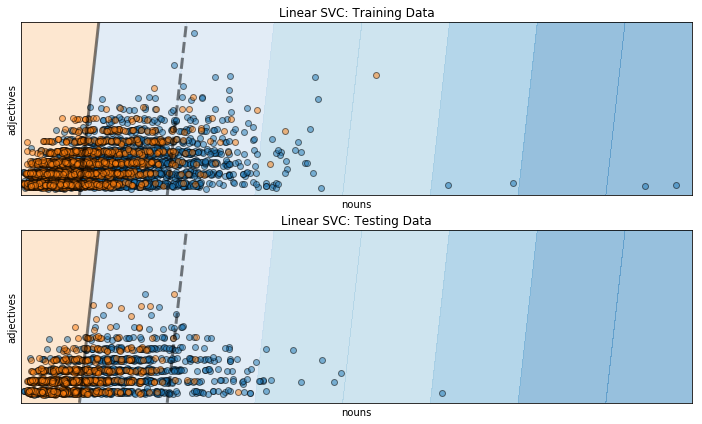

In [20]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,7), nrows=2)
plot_boundary(ax1, classifier, fv, X_train, y_train, "Linear SVC: Training Data")
plot_boundary(ax2, classifier, fv, X_test, y_test, "Linear SVC: Testing Data")
fig.savefig("images/both.png", bbox_inches = 'tight', pad_inches = 0)